# MARKET BASKET ANALYSIS
**Market basket analysis** es una técnica de extracción de datos utilizada por los retail para aumentar las ventas mediante una mejor comprensión de los patrones de compra de los clientes. Implica analizar grandes conjuntos de datos, como el historial de compras, para revelar grupos de productos, así como productos que probablemente se compren juntos

P.ej. la regla **{pepinos, tomates} -> {aceite de girasol}** encontrada en los datos de ventas de un supermercado indicaría que si un cliente compra pepinos y tomates juntos, es probable que también compre aceite de girasol.

# 1. Importar Libraries


In [1]:
!pip install squarify

In [2]:
import numpy as np
import pandas as pd
import squarify
import matplotlib.pyplot as plt

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# 2. Lectura de Datos

In [4]:
df = pd.read_csv('/content/2.1.3 Market_Basket_Optimisation.csv', header = None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FileNotFoundError: [Errno 2] No such file or directory: '/content/2.1.3 Market_Basket_Optimisation.csv'

In [ ]:
df.head(5) # buscando las primeras 5 filas en el conjunto de datos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


esto es un mecanismo para buscar patrones.

# 3. Visualizando datos
Aquí se decidio contar todos los valores únicos en todas las columnas y crear algunas visualizaciones.
P.ej. si tenemos 5 'almendras' en la primera columna, 3 'almendras' en la segunda columna, etc., tendremos 8 'almendras' en total.

In [ ]:
#df = pd.DataFrame()
#for i in range(len(df.columns)):
#    df_res = df_res.index([df_res, df[i].value_counts()], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(df.columns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [ ]:
var= df[0].value_counts()

In [ ]:
df_res = pd.DataFrame()
for i in range(len(df.columns)):# se recorre cada columna
  df_res = df_res.append(df[i].value_counts()) # cada columna , recorre columnas


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_res.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


""


In [ ]:
df_sum = df_res.sum()
df_sum = df_sum.sort_values(ascending=False)
df_sum.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0,)

In [ ]:
df_sum

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Series([], dtype: float64)

Después de contar todos los valores en todas las columnas, podemos construir un **gráfico de frecuencia**.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: index 0 is out of bounds for axis 0 with size 0

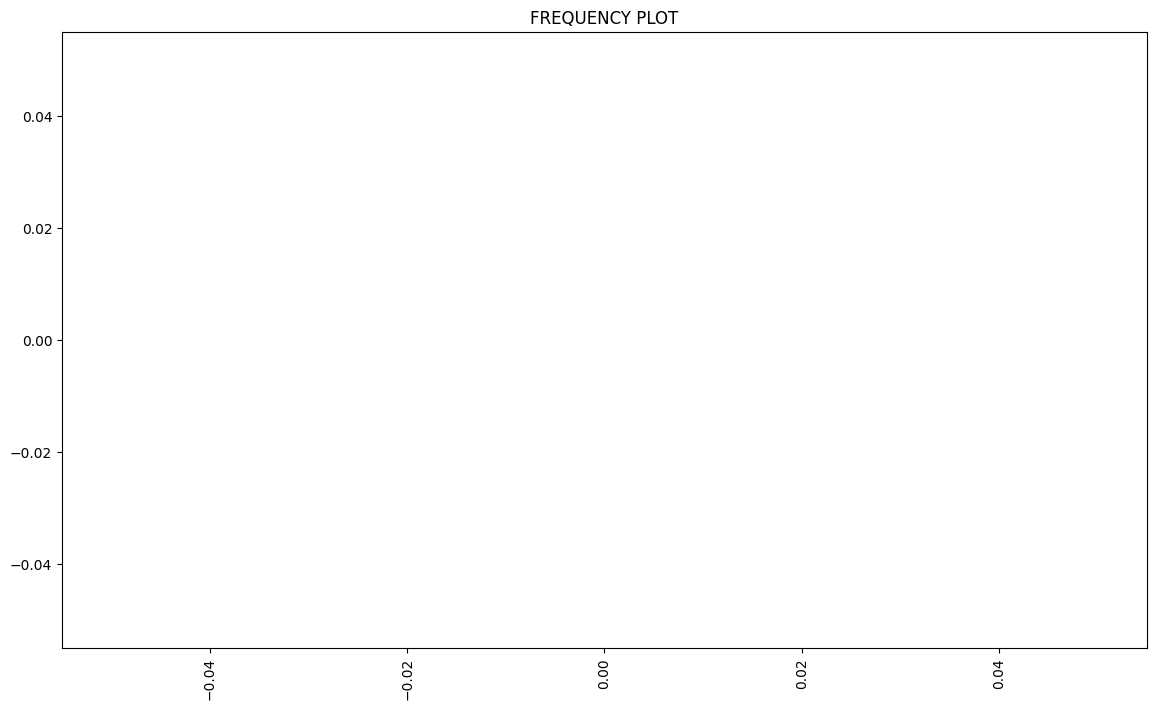

In [ ]:
plt.figure(figsize=(14,8))
plt.title("FREQUENCY PLOT")
cnt = 45 # plot only first 'cnt' values
color = plt.cm.spring(np.linspace(0, 1, cnt))
df_sum.head(cnt).plot.bar(color = color)
plt.xticks(rotation = 'vertical')
plt.grid(False)
plt.axis('on')
plt.show()

También podemos trazar frecuencias, pero en forma de **mapa de calor**:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


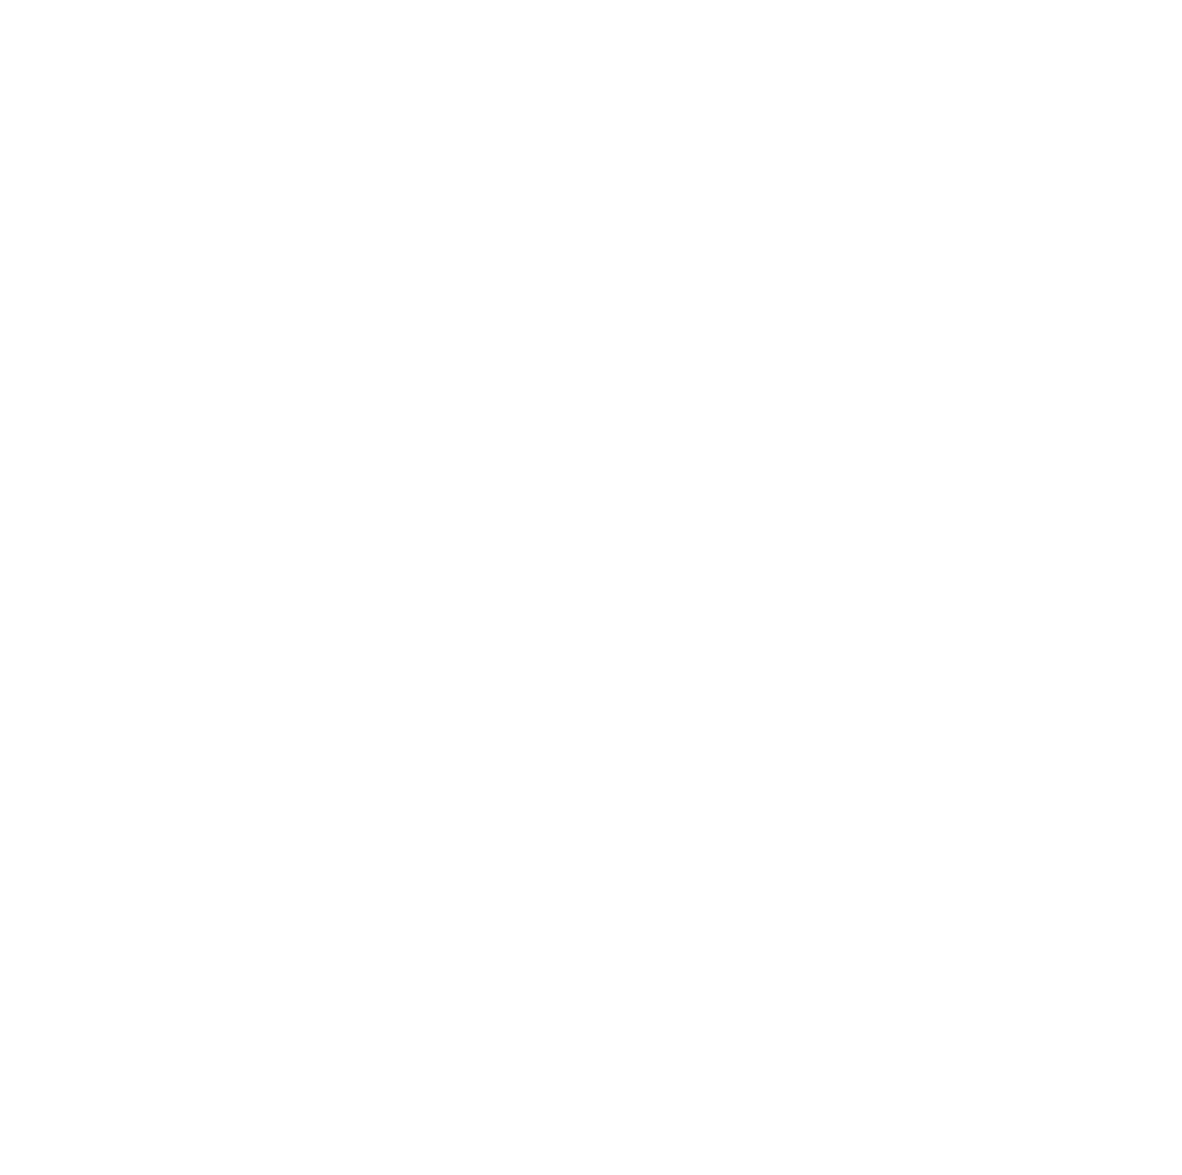

In [ ]:
plt.figure(figsize=(15,15))
cnt = 40 # plot only first 'cnt' values
color = plt.cm.hot(np.linspace(0, 1, cnt))
df_part = df_sum.head(cnt)
squarify.plot(sizes = df_part.values, label = df_part.index, alpha=.8, color = color, text_kwargs={'fontsize':8})
plt.axis('off')
plt.show()

# 4. Transformación de datos
Antes de convertir el conjunto de datos a la vista de transacciones, debemos convertir pandas-data en list-data y luego list-data en numpy-data.

In [ ]:
# making each customers shopping items an identical list
arr = []
for i in range(df.shape[0]):
    arr.append([str(df.values[i,j]) for j in range(df.shape[1])])

arr = np.array(arr)
print(arr.shape)

Y ahora podemos convertir nuestro conjunto de datos a **vista de transacciones**.

In [ ]:
te = TransactionEncoder()
data = te.fit_transform(arr)
data = pd.DataFrame(data, columns = te.columns_)
print(data.shape)

Chequeamos los resultados:

In [ ]:
data.head(3)

Como podemos ver, tenemos **columnas con 'nan' **, por lo que deberíamos eliminarla, porque estos son simplemente valores 'no numéricos', que solo eran celdas vacías en el conjunto de datos original.

In [ ]:
data = data.drop(columns=['nan'])
data.head(3)

# 5. Analizando datos con la regla "apriori"
El algoritmo "apriori" supone que cualquier subconjunto de un conjunto de elementos frecuentes debe ser frecuente. Es el algoritmo detrás del análisis de la cesta de la compra. Digamos que una transacción que contiene {Uvas, Manzana, Mango} también contiene {Uvas, Mango}. Entonces, según el principio de Apriori, si {Uvas, Manzana, Mango} es frecuente, entonces {Uvas, Mango} también debe ser frecuente [[2]](https://www.kdnuggets.com/2019/12/ análisis-de-la-cesta-de-mercado.html).

**Support:** Es la popularidad predeterminada de un artículo. En términos matemáticos, el soporte del elemento A no es más que la relación entre las transacciones que involucran a A y el número total de transacciones.
*Support(Uvas) = (Transacciones que involucran Uvas)/(Transacción total)* [[2]](https://www.kdnuggets.com/2019/12/market-basket-analysis.html).

**Confianza:** Probabilidad de que el cliente haya comprado A y B. Se divide el número de transacciones que involucran a A y B por el número de transacciones que involucran a B.
*Confianza(A => B) = (Transacciones que involucran tanto a A como a B)/(Transacciones que involucran solo a A)* [[2]](https://www.kdnuggets.com/2019/12/market-basket-analysis .html).

Entonces, ahora usaremos la **regla a priori** para encontrar algunas dependencias. [Aquí](http://rasbt.github.io/mlxtend/api_modules/mlxtend.frequent_patterns/apriori/) puedes leer más al respecto.

In [ ]:
freq_rules = apriori(data, min_support = 0.01, use_colnames = True)
freq_rules

Entonces, aquí podemos ver todas las reglas que tienen un soporte mínimo de 0,01.
Si necesitas **reglas con cierta longitud**, podemos filtrar los resultados:

In [ ]:
freq_rules['length'] = freq_rules['itemsets'].apply(lambda x: len(x)) # adding 'length' column
freq_rules

In [ ]:
mask = freq_rules['length'] > 1 # creando una máscara para filtrar con cierta condición
filtered_freq_rules = freq_rules.loc[mask] # aplicando la máscara
filtered_freq_rules # imprimiendo el resultado filtrado

Entonces, al final podemos ver todas las reglas, que tienen cierta longitud y que tienen cierto soporte mínimo.

# 6. Conclusión
Cada vez más organizaciones están descubriendo formas de utilizar el análisis de la cesta de la compra para obtener información útil sobre asociaciones y relaciones ocultas.


